In [1]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
print(raw_dataset)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4    

In [5]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
'''This applies a mapping dictionary to the values in the 'Origin' column. 
The keys of the dictionary (1, 2, 3) represent the original numerical values
in the column, and the corresponding values ('USA', 'Europe', 'Japan') represent
the labels that will replace the original values.'''

"This applies a mapping dictionary to the values in the 'Origin' column. \nThe keys of the dictionary (1, 2, 3) represent the original numerical values\nin the column, and the corresponding values ('USA', 'Europe', 'Japan') represent\nthe labels that will replace the original values."

In [9]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

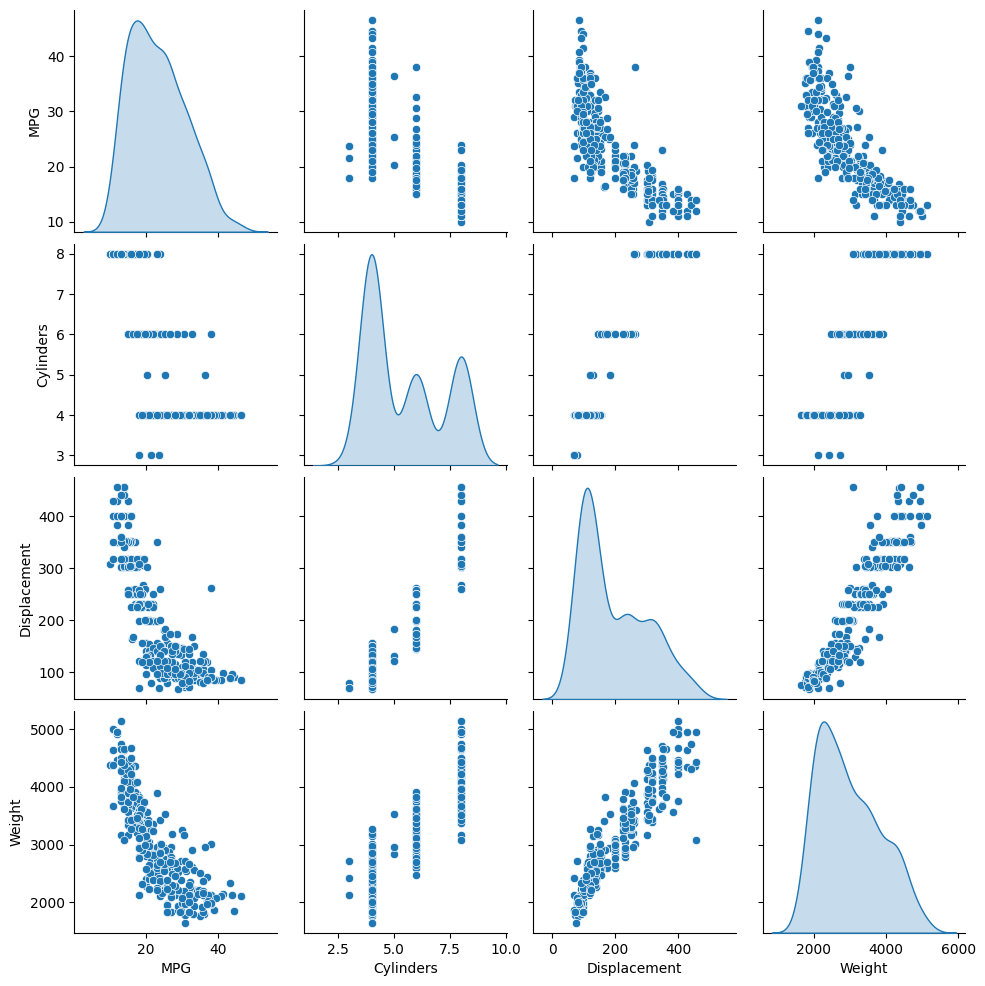

In [11]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [12]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [13]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')
'''By performing these steps, the original dataset is
split into separate dataframes for features (train_features
and test_features) and labels (train_labels and test_labels). 
The features contain all the input variables except for the 
'MPG' column, while the labels contain the corresponding 'MPG'
values. This separation is typically done to prepare the data
for training a machine learning model, where the features are
used to make predictions, and the labels are used to evaluate
the model's performance.'''

"By performing these steps, the original dataset is\nsplit into separate dataframes for features (train_features\nand test_features) and labels (train_labels and test_labels). \nThe features contain all the input variables except for the \n'MPG' column, while the labels contain the corresponding 'MPG'\nvalues. This separation is typically done to prepare the data\nfor training a machine learning model, where the features are\nused to make predictions, and the labels are used to evaluate\nthe model's performance."

In [14]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642


In [15]:
normalizer = tf.keras.layers.Normalization(axis=-1)
'''This is a layer in TensorFlow that performs input normalization.
It scales and centers the input data along a specified axis to make
it easier for the model to learn and converge during training'''
'''The axis parameter specifies along which axis the normalization
should be applied. In this case, axis=-1 indicates that the normalization
will be applied along the last axis of the input tensor. The last axis
typically represents the features or channels of the input data.'''

'The axis parameter specifies along which axis the normalization\nshould be applied. In this case, axis=-1 indicates that the normalization\nwill be applied along the last axis of the input tensor. The last axis\ntypically represents the features or channels of the input data.'

In [16]:
print(train_features.dtypes)


Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Europe             bool
Japan              bool
USA                bool
dtype: object


In [17]:
train_features = train_features.astype('float32')
'''This method is used to change the data type of the DataFrame 
to 'float32'. The 'float32' data type represents single-precision
floating-point numbers, which are commonly used in deep learning models.'''

"This method is used to change the data type of the DataFrame \nto 'float32'. The 'float32' data type represents single-precision\nfloating-point numbers, which are commonly used in deep learning models."

In [18]:
normalizer.adapt(np.array(train_features))
'''By calling normalizer.adapt(np.array(train_features)),
the normalization layer is adapted to the statistics of
the training features data. This means that the layer 
computes and internally stores the mean and variance of 
the training data along the specified axis (the last 
axis in this case). This adaptation process allows the
normalization layer to appropriately normalize the input
data during training and inference using the computed statistics.'''

'By calling normalizer.adapt(np.array(train_features)),\nthe normalization layer is adapted to the statistics of\nthe training features data. This means that the layer \ncomputes and internally stores the mean and variance of \nthe training data along the specified axis (the last \naxis in this case). This adaptation process allows the\nnormalization layer to appropriately normalize the input\ndata during training and inference using the computed statistics.'

In [19]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [24]:
horsepower = np.array(train_features['Horsepower'])
'''This parameter specifies the shape of the input data expected
by the normalization layer. In this case, input_shape=[1,] indicates 
that the layer expects input data with a shape of (batch_size, 1).
The 1 indicates that the layer will normalize data with a single
feature (in this case, Horsepower)'''
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)
'''None: The axis parameter specifies along which axis the normalization
should be applied. Setting axis=None means that the normalization will be
applied to the entire input tensor, regardless of its dimensions. This is 
suitable for a 1D input like Horsepower'''

'None: The axis parameter specifies along which axis the normalization\nshould be applied. Setting axis=None means that the normalization will be\napplied to the entire input tensor, regardless of its dimensions. This is \nsuitable for a 1D input like Horsepower'

In [25]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [26]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 1s 1s/step


array([[-0.056],
       [-0.032],
       [ 0.104],
       [-0.079],
       [-0.071],
       [-0.028],
       [-0.085],
       [-0.071],
       [-0.019],
       [-0.032]], dtype=float32)

In [36]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
'''This parameter specifies the optimizer to be used for training the model. 
    In this case, the Adam optimizer is selected with a learning rate of 0.1. The
    optimizer determines how the models weights and biases are updated during 
    training to minimize the loss.'''
'''This parameter specifies the loss function to be used during training. 
The loss function quantifies the discrepancy between the predicted output
and the true output. In this case, the mean absolute error (MAE) is selected
as the loss function. MAE measures the average absolute difference between 
the predicted and true values.'''

'This parameter specifies the loss function to be used during training. \nThe loss function quantifies the discrepancy between the predicted output\nand the true output. In this case, the mean absolute error (MAE) is selected\nas the loss function. MAE measures the average absolute difference between \nthe predicted and true values.'

In [37]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 922 ms
Wall time: 2.17 s


In [38]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804149,4.193760,95
96,3.806509,4.188678,96
97,3.802866,4.198693,97
98,3.802151,4.190542,98
99,3.801996,4.178057,99


In [39]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

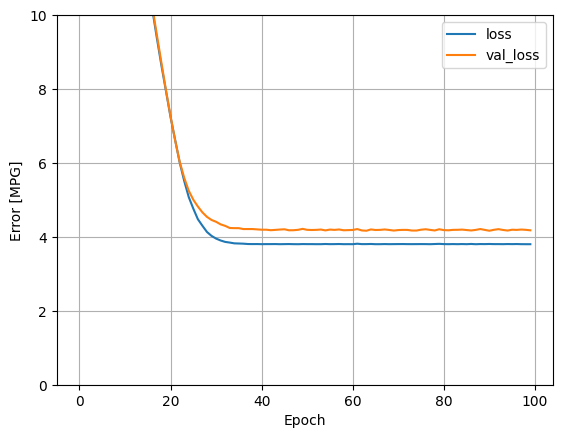

In [40]:
plot_loss(history)

In [41]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [42]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 818us/step


In [43]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

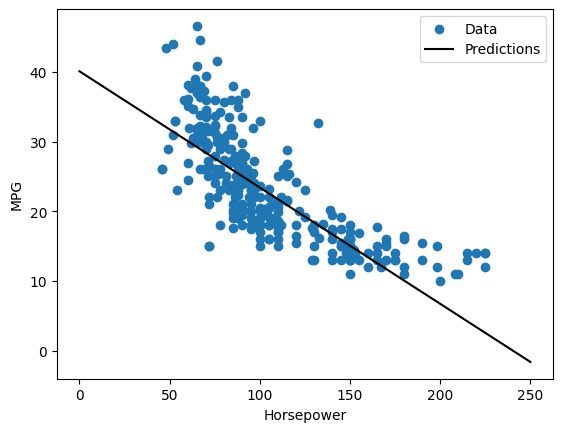

In [44]:
plot_horsepower(x, y)

In [45]:
#Now, it is time for multiple linear regression, more of the real deal here!
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [46]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 27ms/step


array([[-0.672],
       [-0.775],
       [-0.324],
       [ 0.483],
       [ 1.246],
       [-0.242],
       [ 1.133],
       [-0.499],
       [-0.656],
       [-0.173]], dtype=float32)

In [47]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.602],
       [-0.103],
       [-0.51 ],
       [ 0.129],
       [-0.651],
       [ 0.484],
       [ 0.318],
       [ 0.719],
       [-0.017]], dtype=float32)>

In [48]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [49]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 234 ms
Wall time: 2.05 s


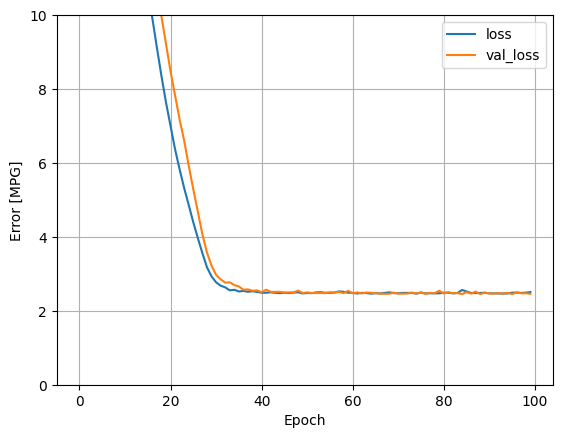

In [50]:
plot_loss(history)

In [51]:
#convert test_features and test_lables to floats, which can then be analyzed 
test_features = test_features.astype('float32')
test_labels = test_labels.astype('float32')

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [52]:
#the real deal here, what you've been waiting for! The following code is for a deep neural network (DNN)
#which is the one with hidden layers and many levels of parameters.
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
'''model = keras.Sequential([...]) This line creates a sequential model object named model using keras.Sequential. The model is defined with the following layers:
norm: The normalization layer passed as an argument to the function, serving as the first layer in the model.
layers.Dense(64, activation='relu'): A dense layer with 64 units and ReLU activation function.
layers.Dense(64, activation='relu'): Another dense layer with 64 units and ReLU activation function.
layers.Dense(1): The final dense layer with 1 unit, representing the output layer of the model.'''
'''model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001)) This line compiles the model
using model.compile(). The compilation configures the model for training with the following settings:
loss='mean_absolute_error': The loss function is set to mean absolute error (MAE), which calculates the absolute difference 
between the predictions and the true values.
optimizer=tf.keras.optimizers.Adam(0.001): The Adam optimizer is chosen with a learning rate of 0.001. The optimizer is 
responsible for updating the model's weights during training to minimize the loss function.'''

"model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001)) This line compiles the model\nusing model.compile(). The compilation configures the model for training with the following settings:\nloss='mean_absolute_error': The loss function is set to mean absolute error (MAE), which calculates the absolute difference \nbetween the predictions and the true values.\noptimizer=tf.keras.optimizers.Adam(0.001): The Adam optimizer is chosen with a learning rate of 0.001. The optimizer is \nresponsible for updating the model's weights during training to minimize the loss function."

In [53]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [54]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [55]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: total: 391 ms
Wall time: 2.23 s


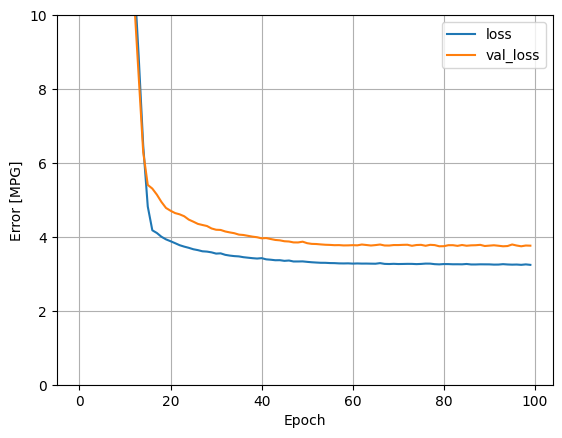

In [56]:
plot_loss(history)

In [57]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 715us/step


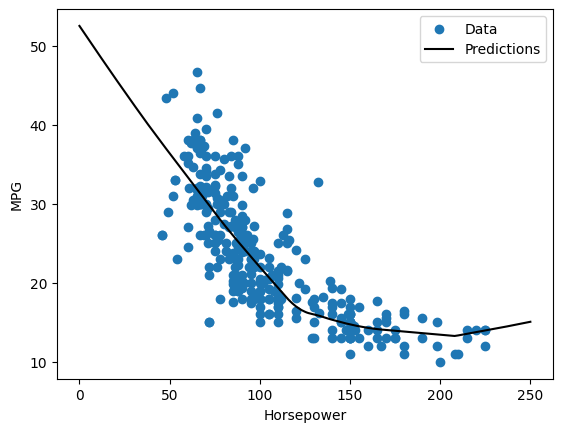

In [58]:
plot_horsepower(x, y)

In [59]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

In [60]:
#Now we will be using the multivariable model with deep neural network learning
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [61]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: total: 578 ms
Wall time: 2.31 s


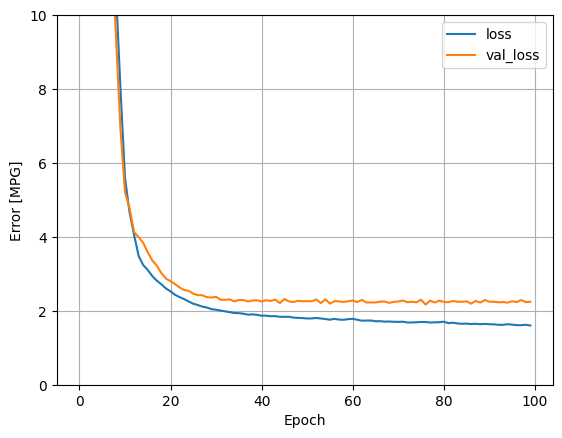

In [62]:
plot_loss(history)

In [63]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [64]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.644117
linear_model,2.499620
dnn_horsepower_model,2.893746
dnn_model,1.671483


3/3 [==============================] - 0s 1ms/step


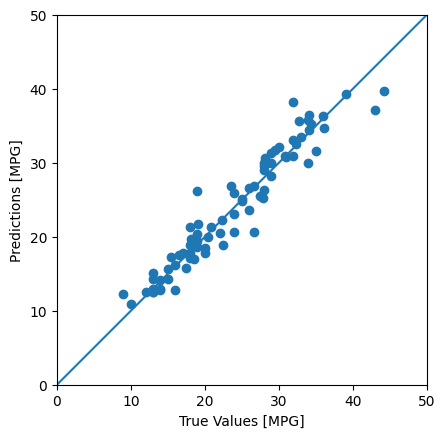

In [65]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


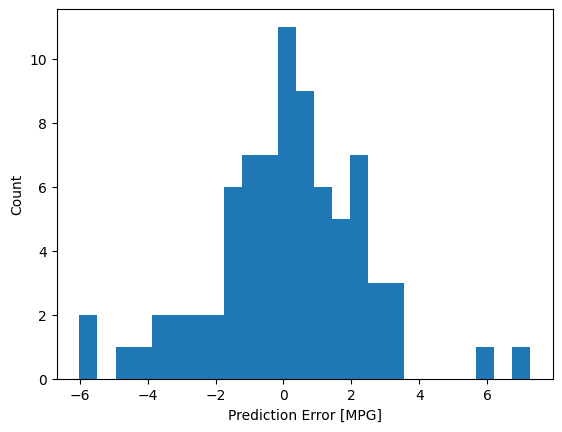

In [66]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [67]:
dnn_model.save('dnn_model.keras')

In [68]:
#r squared statistical analysis for Multivariable DNN 
#install scitkit learn
from sklearn.metrics import r2_score

# Calculate R-squared value
r2 = r2_score(test_labels, test_predictions)
print("R-squared:", r2)


R-squared: 0.9211864838577106


In [71]:
#Other such statistics
import statsmodels.api as sm 

# Calculate Mean Squared Error (MSE)
mse = np.mean((test_predictions - test_labels) ** 2)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Perform OLS regression analysis
X = sm.add_constant(test_features)  # Add constant term
ols_model = sm.OLS(test_labels, X)
ols_results = ols_model.fit()

# Print the regression summary
print(ols_results.summary())

# Access regression coefficients
coefficients = ols_results.params
print("Regression Coefficients:")
print(coefficients)

# Calculate p-values
p_values = ols_results.pvalues
print("P-values:")
print(p_values)

# Confidence Intervals
confidence_intervals = ols_results.conf_int()
print("Confidence Intervals:")
print(confidence_intervals)

Mean Squared Error (MSE): 5.1470523
Root Mean Squared Error (RMSE): 2.2687116
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     69.59
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           5.31e-30
Time:                        01:58:22   Log-Likelihood:                -187.67
No. Observations:                  78   AIC:                             393.3
Df Residuals:                      69   BIC:                             414.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------